# Overview

Networks (a.k.a. graphs) are widely used mathematical objects for representing and analysing social systems. 
This week is about getting familiar with networks, and we'll focus on four main aspects:

* Basic mathematical description of networks
* The `NetworkX` library.
* Building the network of GME redditors.
* Basic analysis of the network of GME redditors.

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. You will watch some videos made by Sune for his course _Social Graphs and Interactions_, where he covers networks in details.  

> **_Video Lecture_**. Start by watching the ["History of Networks"](https://youtu.be/qjM9yMarl70). 


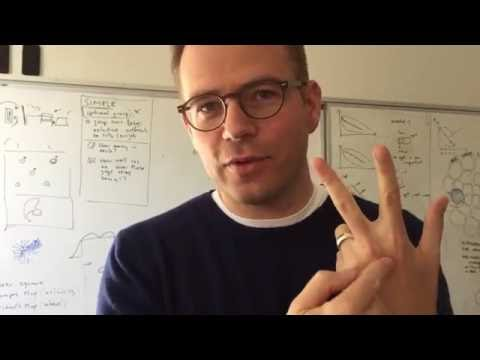

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on ["Network Notation"](https://youtu.be/MMziC5xktHs). 

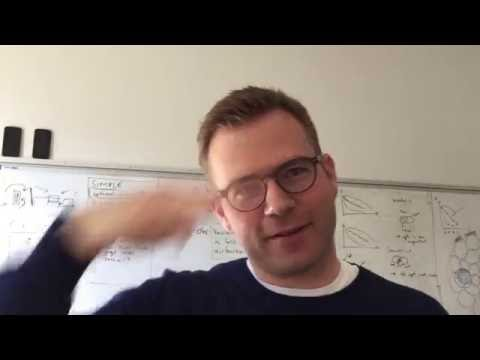

In [2]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in a Jupyter notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
> 
> _Chapter 2_
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

## Spørgsmål 1 

DSB tog stationer - edges er togbanen og nodes er stationerne
Ens stamtræ - hvor nodes er personer og links er til ens forældre
Avis artikler som nodes og link er emner de har tilfælles

Stamtræ kan være infinite stort, men kan mappes langt tilbage. Dog, er der en begræsning i folkeregistret. Det er interresant at kunne vide mere om sin slægt og hvor man kommer fra.
Stopping the corona varus 

## Spørgsmål 2 

Diplomatisk kontakt mellem lande hvor hver node er et land og der er link imellem dem hvis de har diplomatisk kontakt




# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  *Exercises*:

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

#### Man kan gå gennem a,c og d. Kunne have været dejligt hvis de havde tegnet nodes ind i grafen måske kan man ikke gå ind i c afhængigt af hvor der er nodes. 

In [90]:
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (3,1),(6,1),(4,1),(6,3),(2,4),(2,3),(3,2)])
H = nx.Graph(G)
A1 = nx.adjacency_matrix(H)
A = nx.adjacency_matrix(G)
print(A1.todense())
print()
print(A.todense())
print()
print(nx.algorithms.average_clustering(H))
print(nx.algorithms.average_clustering(G))

for path in nx.all_simple_edge_paths(H, source=1, target = 3):
    if len(path)  == 3:
        print(path)


[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

0.6388888888888888
0.32222222222222224
[(1, 4), (4, 2), (2, 3)]


In [30]:
import networkx as nx 
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

G.add_edge(1, 2)
e = (2, 3) # tuple
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)


G.clear()

G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
print(G.number_of_nodes())
print(G.number_of_edges())

print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1])) # or list(G.neighbors(1)) 

print(G.degree[1]) #  the number of edges incident to 1

print(G.edges([2, 'm']))
print(G.degree([2, 3]))

8
3
[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2
[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


In [31]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [32]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

In [33]:
#Removing elemetns from graph 

G.remove_node(2)

G.remove_nodes_from("spam")

print(list(G.nodes))


G.remove_edge(1, 3)



[1, 3, 'spam']


In [35]:
# Using the graph constructors

G.add_edge(1, 2)

H = nx.DiGraph(G)   # create a DiGraph using the connections from G

print(list(H.edges()))


edgelist = [(0, 1), (1, 2), (2, 3)]

H = nx.Graph(edgelist)

[(1, 2), (2, 1)]


In [40]:
# Accessing edges and neighbors
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])  # same as G.adj[1]
print(G[1][2])
print(G.edges[1, 2])
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}


{'color': 'red'}

In [41]:
FG = nx.Graph()

FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [42]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [46]:
G = nx.Graph(day="Friday")
print(G.graph)

# Or modify after 
G.graph['day'] = "Monday"

G.graph

{'day': 'Friday'}


{'day': 'Monday'}

In [47]:
#Add nodes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [48]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [50]:
# Edging attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [58]:
#Directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.nodes)
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

H = nx.Graph(G)  # create an undirected graph H from a directed graph G

0.5
[1, 2, 3]
[2]
[2]


In [61]:
# Multigraphs 

MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

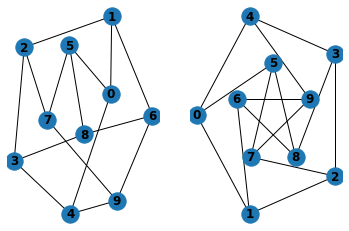

In [65]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()


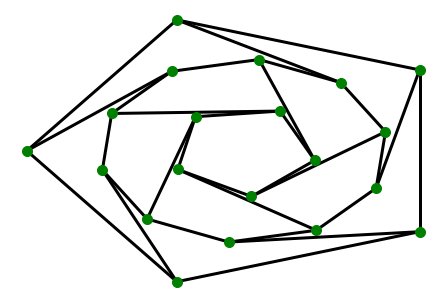

In [69]:
options = {

    'node_color': 'green',

    'node_size': 100,

    'width': 3,

}
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

In [ ]:
options = {
    'node_color': 'green',
    'node_size': 100,
    'width': 3,
}

# Part 3: Building the GME redditors network

Ok, enough with theory :) It is time to go back to our cool dataset it took us so much pain to download! And guess what? We will build the network of GME Redditors. Then, we will use some Network Science to study some of its properties.


> 
> *Exercise*: Build the network of Redditors discussing about GME on r\wallstreetbets. In this network, nodes correspond to authors of comments, and a direct link going from node _A_ to node _B_ exists if _A_ ever answered a submission or a comment by _B_. The weight on the link corresponds to the number of times _A_ answered _B_. You can build the network as follows:
>
> 1. Open the _comments dataset_ and the _submission datasets_ (the first contains all the comments and the second cointains all the submissions) and store them in two Pandas DataFrames.
> 2. Create three dictionaries, using the command ``dict(zip(keys,values))``, where keys and values are columns in your dataframes. The three dictionaries are the following:
>     * __comment_authors__: (_comment id_, _comment author_)
>     * __parent__:  (_comment id_ , _parent id_)
>     * __submission_authors__: (_submission id_, _submission author_)
>
> where above I indicated the (key, value) tuples contained in each dictionary.
>
> 3. Create a function that take as input a _comment id_ and outputs the author of its parent. The function does two things:
>     * First, it calls the dictionary __parent__, to find the _parent id_ of the comment identified by a given _comment id_. 
>     * Then, it finds the author of  _parent id_. 
>          * if the _parent id_ starts with "t1_", call the __comment_authors__ dictionary (for key=parent_id[3:])
>          * if the _parent id_ starts with "t3_", call the __submission_authors__ dictionars (for key=parent_id[3:])
>
> where by parent_id[3:], I mean that the first three charachters of the _parent id_ (either "t1_" or "t3_" should be ingnored).
>
> 4. Apply the function you created in step 3. to all the comment ids in your comments dataframe. Store the output in a new column, _"parent author"_, of the comments dataframe. 
> 5. For now, we will focus on the genesis of the GME community on Reddit, before all the hype started and many new redditors jumped on board. For this reason, __filter all the comments written before Dec 31st, 2020__. Also, remove deleted users by filtering all comments whose author or parent author is equal to "[deleted]". 
> 6. Create the weighted edge-list of your network as follows: consider all comments (after applying the filtering step above), groupby ("_author_", _"parent author"_) and count. 
> 7. Create a [``DiGraph``](https://networkx.org/documentation/stable//reference/classes/digraph.html) using networkx. Then, use the networkx function [``add_weighted_edges_from``](https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.DiGraph.add_weighted_edges_from.html) to create a weighted, directed, graph starting from the edgelist you created in step 5.

In [197]:
import pandas as pd
posts =  pd.read_csv("submissions.csv", parse_dates=["created"], index_col=0).set_index("created")
comments = pd.read_csv("gmecomments.csv", parse_dates=["created"] ,index_col=0).set_index("created")

dic1 = dict(zip(comments["id"], comments["author"]))
dic2 = dict(zip(comments["id"], comments["parent_id"]))
dic3 = dict(zip(posts["id"], posts["author"]))


def author(comment_id):
    try:
        parent_id = dic2[comment_id]
        if parent_id[0:3] == "t1_":
            parent_id = dic1[parent_id[3:]]
        else:
            parent_id = dic3[parent_id[3:]]
        return parent_id
    except KeyError:
        return None
comments["parent_author"] = comments.apply(lambda row: author(row["id"]), axis=1)
comments

    

,id,score,author,submission_id,parent_id,parent_author
created,,,,,,
2021-01-29 19:15:24,gl9xwwd,1,Abruzzi19,t3_l4zorz,t1_gl9r29q,Theta_Gang_and_Chill
2021-01-29 18:35:33,gl9r29q,1,Theta_Gang_and_Chill,t3_l4zorz,t1_gl9qyb3,Abruzzi19
2021-01-29 18:34:55,gl9qyb3,1,Abruzzi19,t3_l4zorz,t1_gkrjmzd,None
2021-01-28 03:46:25,gl1ms7f,1,LFG530,t3_l4zinc,t1_gkrdqwo,None
2021-01-27 20:51:45,gkzy202,1,[deleted],t3_l4zfl8,t3_l4zfl8,Outrageous_Guy_713
...,...,...,...,...,...,...
2020-01-01 03:47:31,fcp4s0n,1,jawnee-cash,t3_eick65,t3_eick65,DeepFuckingValue
2020-01-01 03:43:50,fcp4j6m,1,billwhiz,t3_eick65,t1_fcp44yc,perfectentry1
2020-01-01 03:41:11,fcp4chb,1,Sakira-Cadman,t3_eick65,t1_fcp44yc,perfectentry1


In [198]:
import datetime as dt
from datetime import date
comments = comments[comments['parent_author'] != '[deleted]']
comments = comments[comments['author'] != '[deleted]']
comments = comments[comments.index < pd.to_datetime(date(2020, 12, 30))]





In [199]:
comments = comments.dropna()
comments

,id,score,author,submission_id,parent_id,parent_author
created,,,,,,
2020-12-29 23:59:55,ghg1zie,3,Yendenmandem,t3_kmn5ey,t1_ghfjqkb,Zarozer
2020-12-29 23:59:29,ghg1xpl,3,blackhawksfan69,t3_kmmqvl,t1_ghfpqz3,whale_random
2020-12-29 23:59:23,ghg1xbs,2,ArmZeroHammer,t3_kmp114,t3_kmp114,MoneyInAMoment
2020-12-29 23:59:11,ghg1whj,7,JokAAAr,t3_kmq3dv,t1_ghg18mo,DownrightNeighborly
2020-12-29 23:57:54,ghg1rf2,1,IncomeIdea,t3_kmp114,t1_ghg1lre,its_Tow
...,...,...,...,...,...,...
2020-01-01 03:47:31,fcp4s0n,1,jawnee-cash,t3_eick65,t3_eick65,DeepFuckingValue
2020-01-01 03:43:50,fcp4j6m,1,billwhiz,t3_eick65,t1_fcp44yc,perfectentry1
2020-01-01 03:41:11,fcp4chb,1,Sakira-Cadman,t3_eick65,t1_fcp44yc,perfectentry1


In [207]:
edge_list = []
grouped = comments.groupby(["author", "parent_author"]).count()
print(grouped)
w_list = grouped["id"]
e_list = grouped.index.to_frame()
G = nx.DiGraph()
G.add_weighted_edges_from(zip(e_list["author"], e_list["parent_author"], w_list), weight="weight")
print(G.nodes)

                                     id  score  submission_id  parent_id
author             parent_author                                        
----The_Truth----- BorpleFlorpleWho   1      1              1          1
                   CD2471             1      1              1          1
                   DeepFuckingValue   1      1              1          1
---MrP---          Nasty_Nate2324     1      1              1          1
                   Uberkikz11         2      2              2          2
...                                  ..    ...            ...        ...
zyroyoyz           CPTHubbard         1      1              1          1
                   Stonksflyingup     1      1              1          1
zyx2239            dcluttrell         1      1              1          1
zzman14            hrifandi           1      1              1          1
zzzaacchh          AceOrigins         1      1              1          1

[91318 rows x 4 columns]
['----The_Truth-----', 'B

# Part 4: Preliminary analysis of the GME redditors network

We begin with a preliminary analysis of the network.

> 
> *Exercise: Basic Analysis of the Redditors Network*
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4). 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.


In [217]:
print(len(G.nodes))
print(len(G.edges))

# Skal lave histogram
print(G.out_degree())

27357
91318
27357
